In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

#root_dir = 'C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions'

from google.colab import drive
drive.mount('/content/drive')



root_dir = '/content/drive/MyDrive/IA_ProyectoAgosto/emociones'

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

Mounted at /content/drive


In [2]:
labels = os.listdir(train_dir)
target_var = labels

In [3]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 35887
Total training images: 28709
Total testing images: 7178


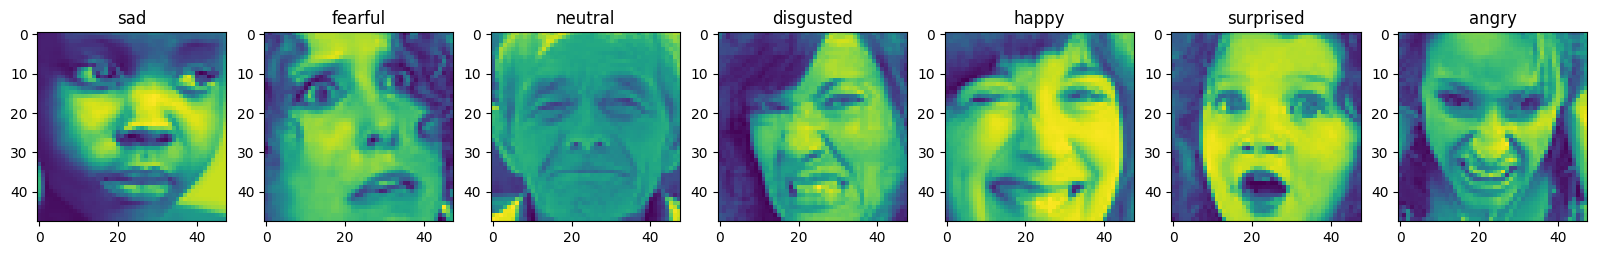

In [4]:
fig, axes = plt.subplots(1, 7, figsize=(20,8))

for i in range(len(target_var)):
    #d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    d = os.path.join(train_dir, target_var[i], os.listdir(os.path.join(train_dir, target_var[i]))[0]) # Use os.path.join for path construction
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

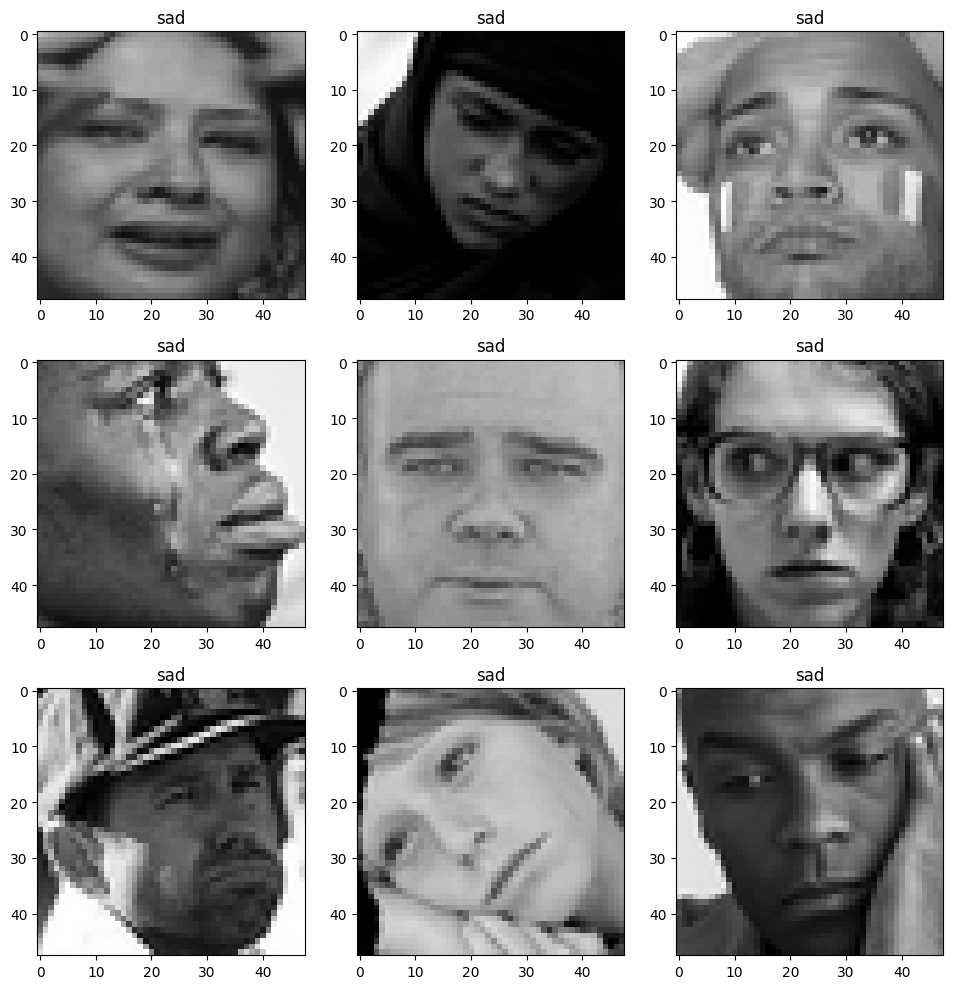

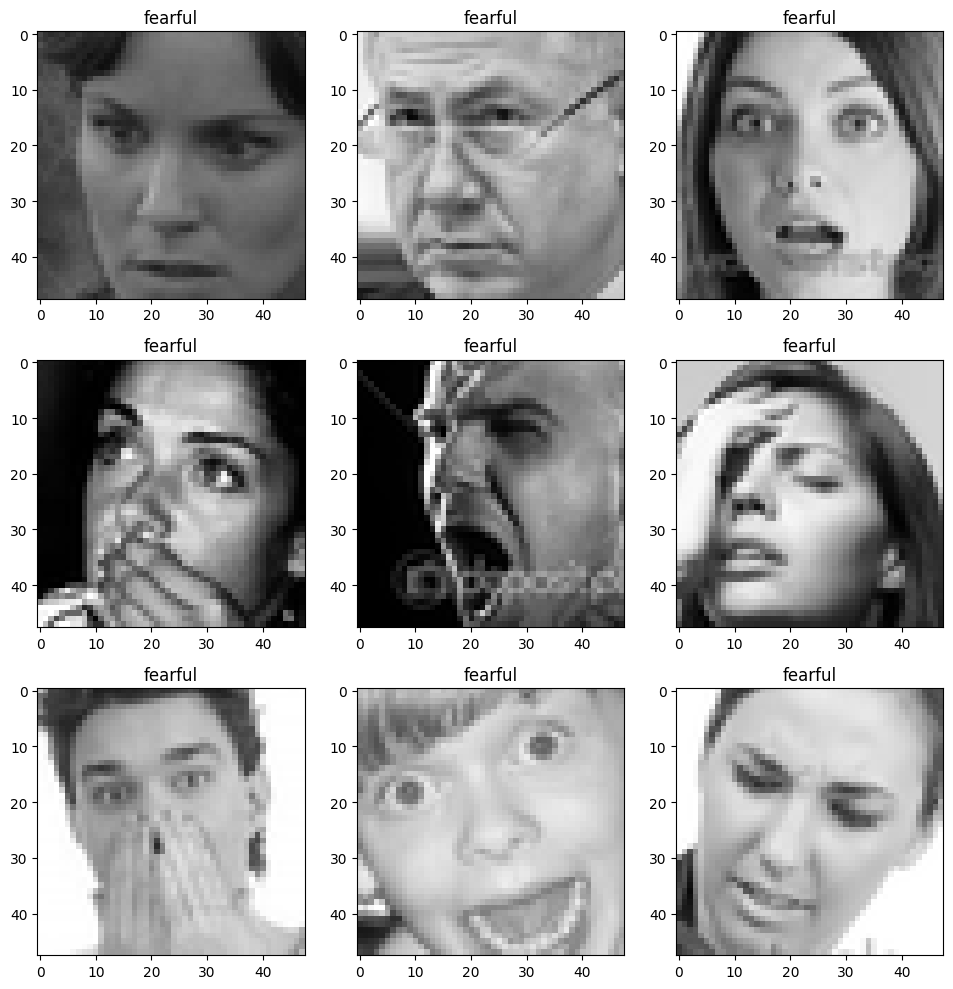

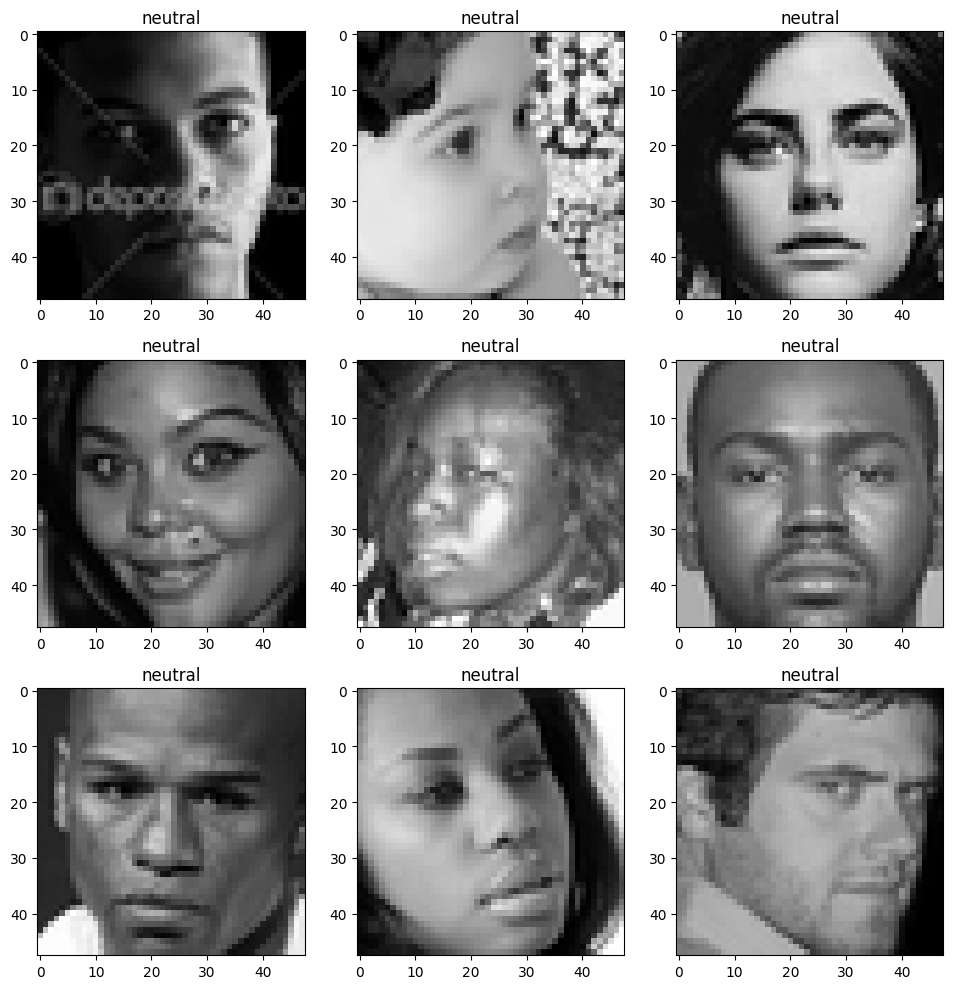

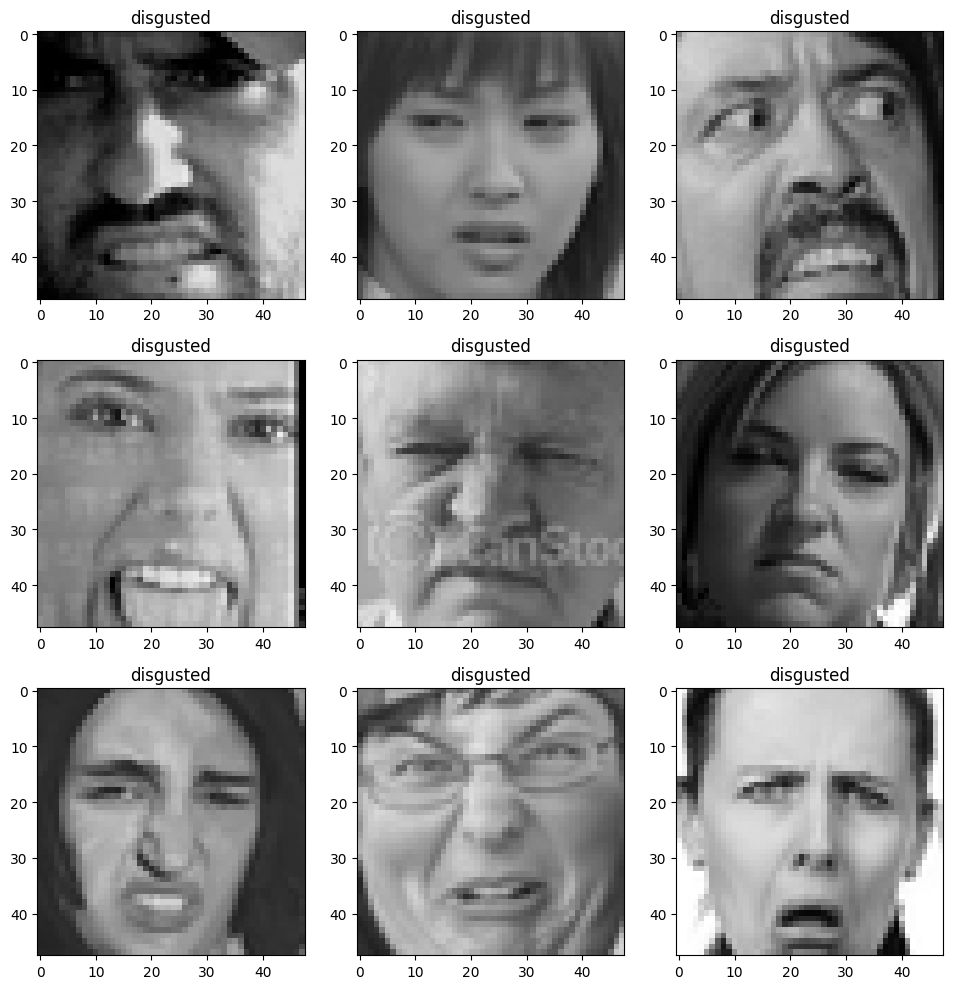

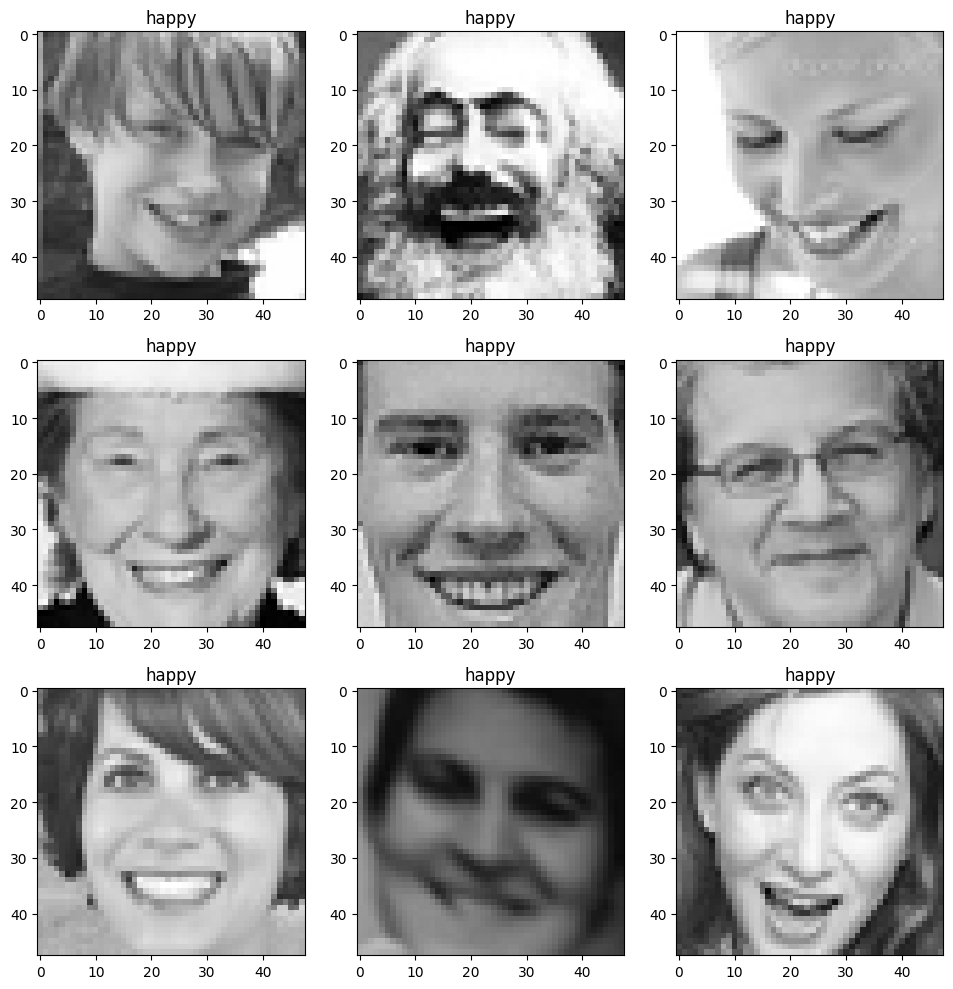

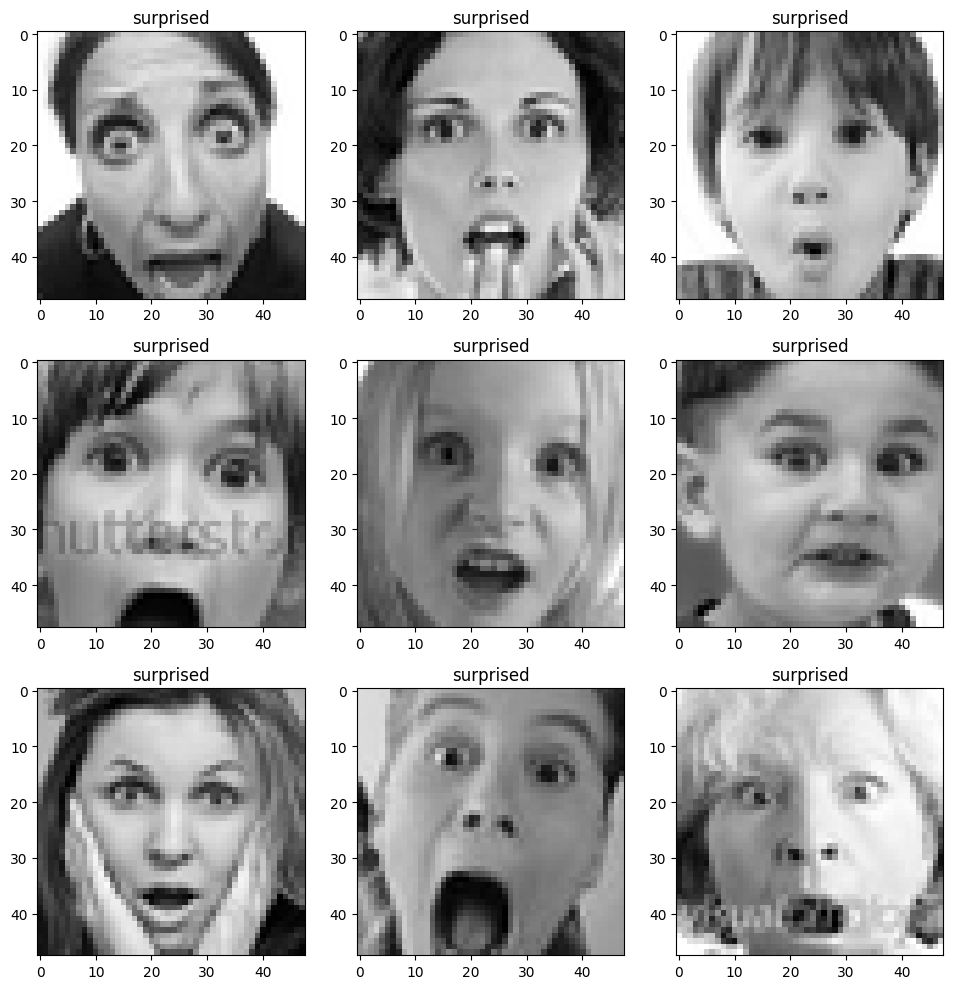

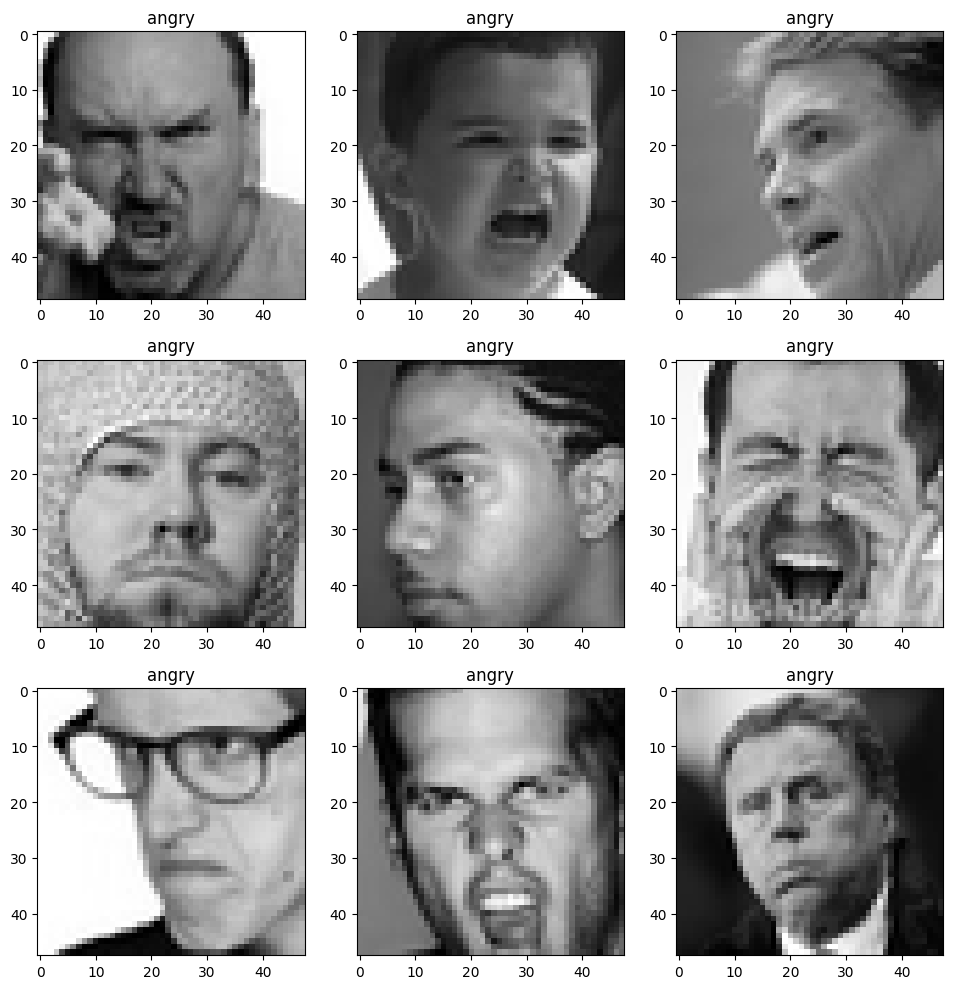

In [5]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

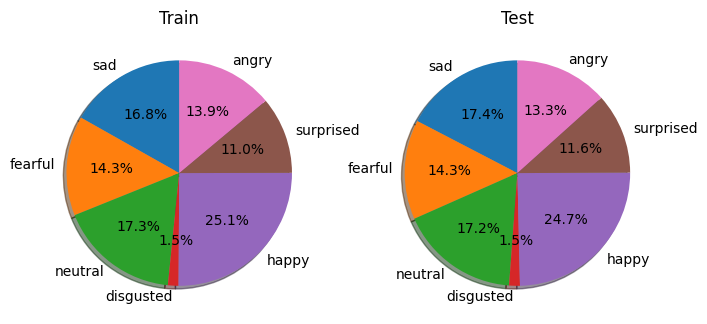

Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : surprised
	Training : 3171
	 Testing : 831
Emotion : angry
	Training : 3995
	 Testing : 958


In [6]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

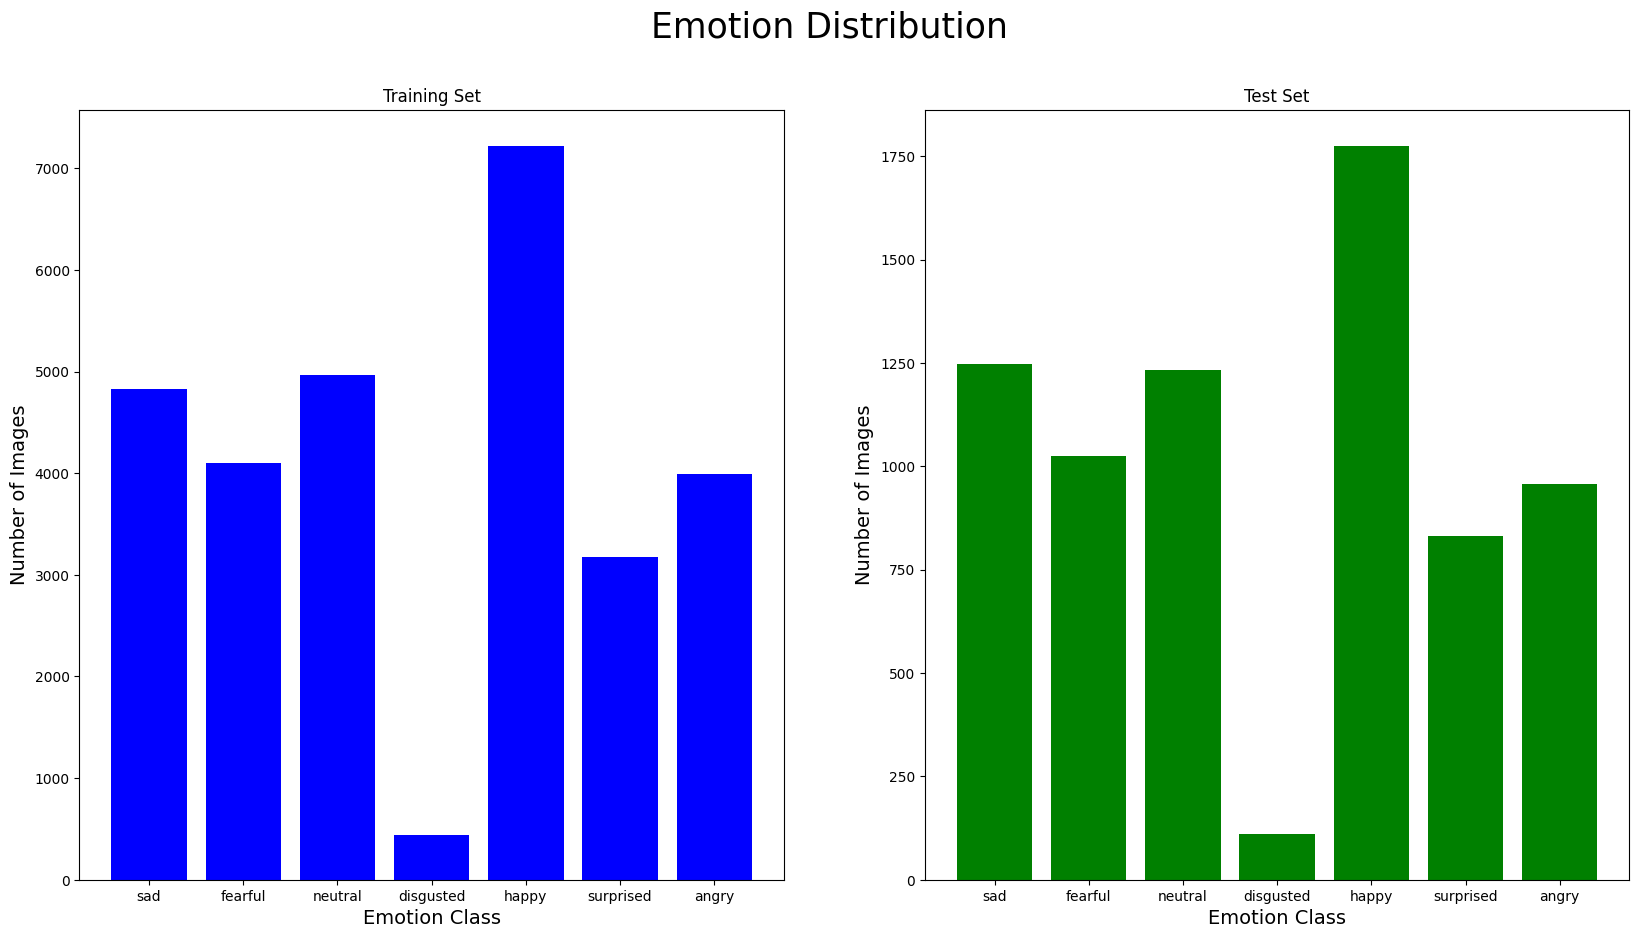

In [7]:
#bar charts
train_dist = np.array([len(os.listdir(train_dir+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_dir+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
train.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [10]:
test.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [11]:


model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 9722s 27s/step - accuracy: 0.1594 - loss: 3.0006 - val_accuracy: 0.2482 - val_loss: 2.1281
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 267ms/step - accuracy: 0.1886 - loss: 2.5945 - val_accuracy: 0.2696 - val_loss: 1.9324
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 96s 264ms/step - accuracy: 0.2114 - loss: 2.3834 - val_accuracy: 0.2801 - val_loss: 1.8433
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 271ms/step - accuracy: 0.2190 - loss: 2.2833 - val_accuracy: 0.2864 - val_loss: 1.8363
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 96s 264ms/step - accuracy: 0.2349 - loss: 2.1698 - val_accuracy: 0.3118 - val_loss: 1.8173
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 266ms/step - accuracy: 0.2542 - loss: 2.0974 - val_accuracy: 0.3203 - val_loss: 1.7707
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 272ms/step - accuracy: 0.2709 - loss: 2.0139 - val_accuracy: 0.3433 - val_loss: 1.7382
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 139s 263ms/step - accuracy: 0.2849 - loss: 1.9587 - v

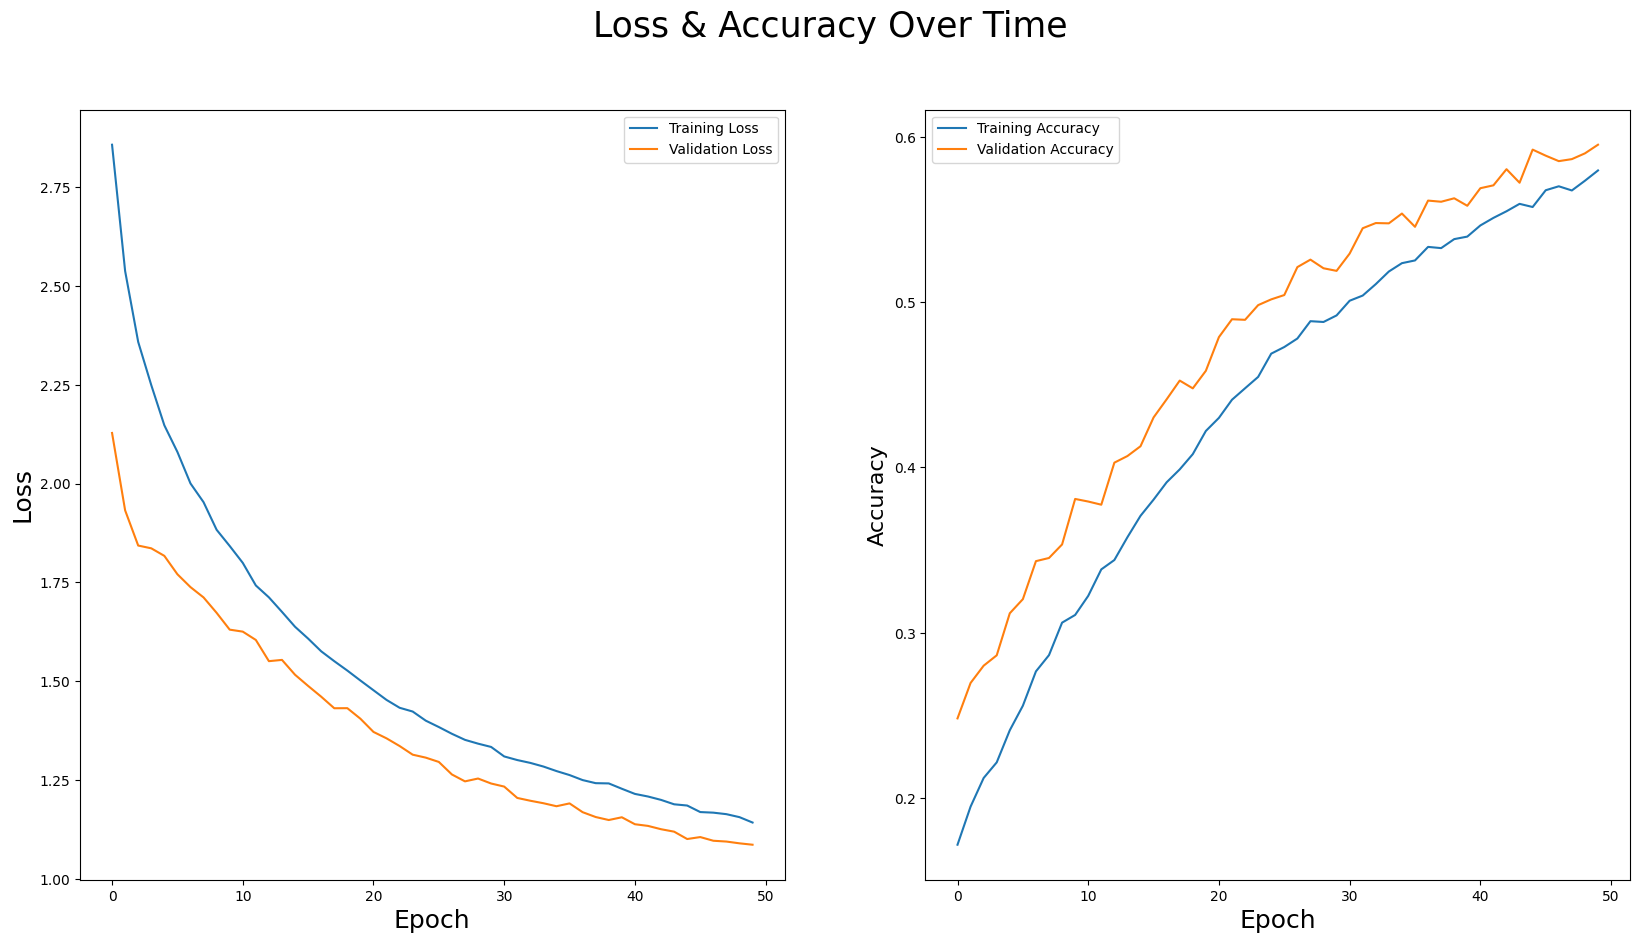

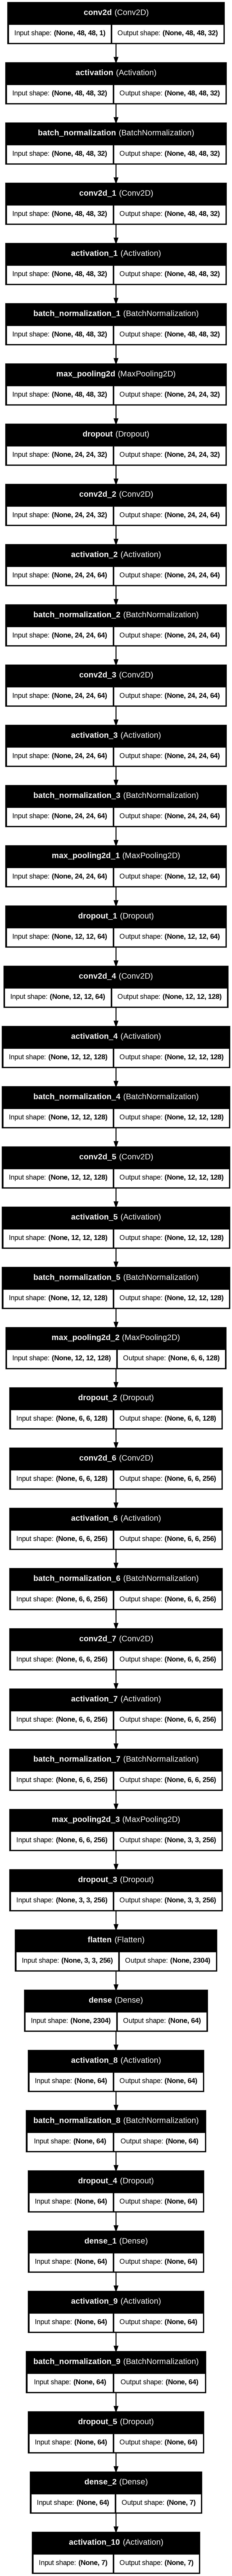

In [13]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/IA_ProyectoAgosto/model_1.png', show_shapes=True, show_layer_names=True)

In [14]:
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_1.h5')

Test

113/113 ━━━━━━━━━━━━━━━━━━━━ 2480s 22s/step


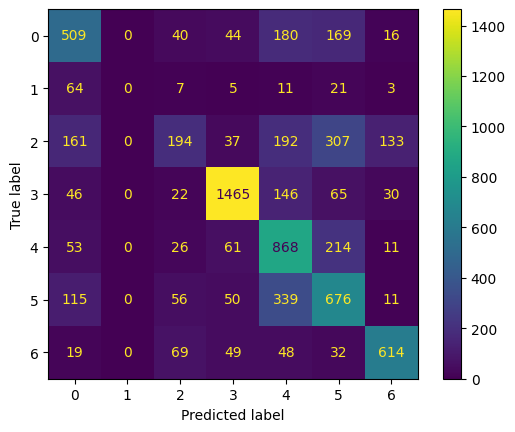

              precision    recall  f1-score   support

           0     0.5264    0.5313    0.5288       958
           1     0.0000    0.0000    0.0000       111
           2     0.4686    0.1895    0.2698      1024
           3     0.8562    0.8258    0.8407      1774
           4     0.4865    0.7040    0.5754      1233
           5     0.4555    0.5421    0.4951      1247
           6     0.7506    0.7389    0.7447       831

    accuracy                         0.6027      7178
   macro avg     0.5063    0.5045    0.4935      7178
weighted avg     0.5983    0.6027    0.5879      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
y_pred = model.predict(test)
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

y_actual = test.classes[test.index_array]
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

In [16]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

359/359 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - accuracy: 0.6353 - loss: 0.9827
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.5229 - loss: 1.2275


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}
Prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction: sad


<BarContainer object of 7 artists>

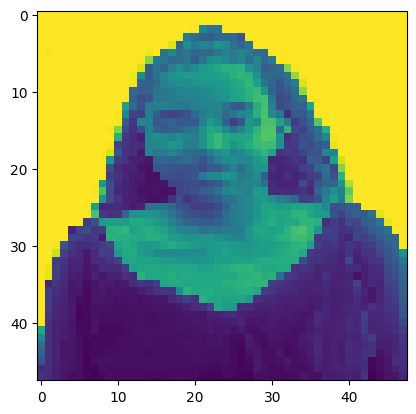

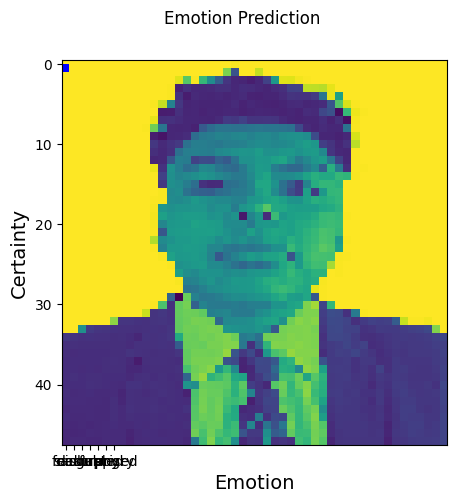

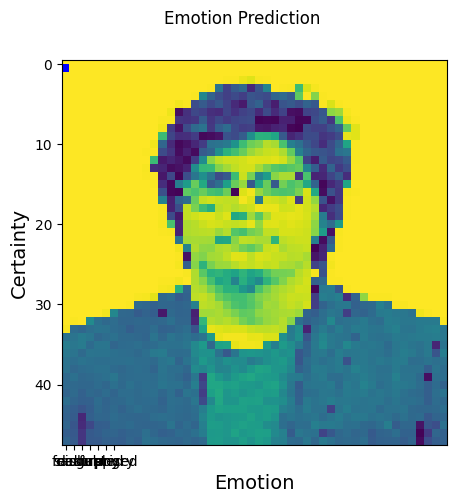

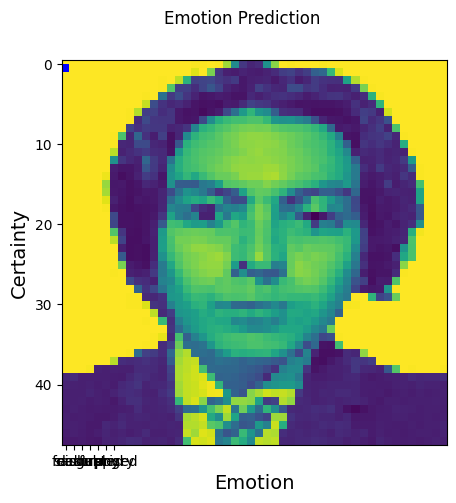

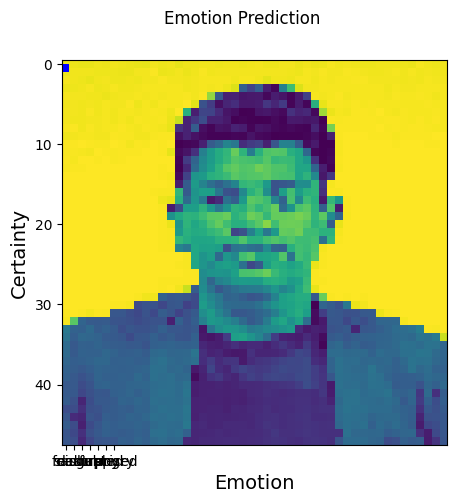

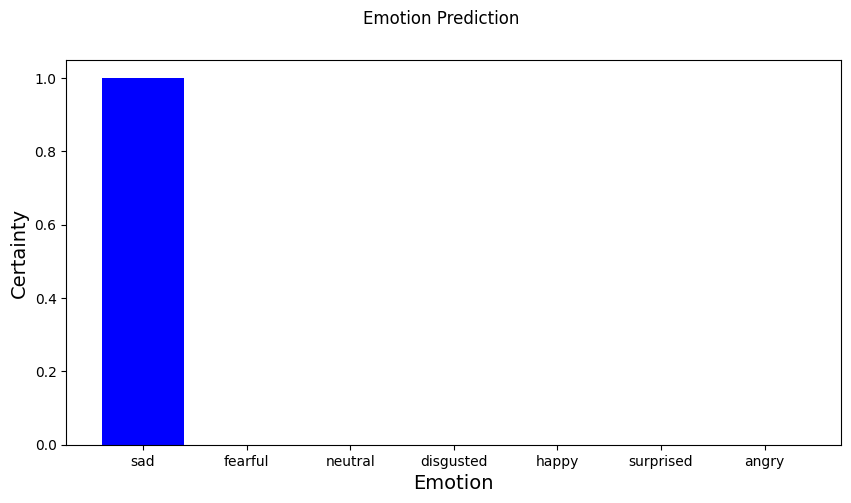

In [18]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/01.png',target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

target_var = sorted(labels)
#labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction



#checfking the example pic of surperised with the current model
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/45.jpg', target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)



img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction prediction


img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/70.jpg',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)



img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/42.jpg',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)



img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')



img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/78.jpg',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)



img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')




img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/55.png',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)



img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')





In [21]:
#Saving our model/weights
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_1.h5')
# Change the filename to end with '.weights.h5'
model.save_weights('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_1_weight.weights.h5')
# Use 'model_1' instead of 'emotion' to access the training history
np.save("history", model_1.history)
print('saved model_1 to disk.')

saved model_1 to disk.
